In [1]:
import pandas as pd
import os
import gzip
import pickle

# category = "groupbuys"
category = "hardware"
# category = "miners"
# category = "mining"
# category = "mining_support"
# category = "pools"

# category = "mining_speculation"



In [2]:
categories = [
    "groupbuys",
    "hardware",
    "miners",
    "mining",
    "mining_support",
    # "pools",
    # "mining_speculation"
]

total_threads = 0
total_chars = 0
total_posts_global = 0
all_dates = []

threads_in_category = []

character_counts = []
thread_character_counts = []
for cat in categories:
    with gzip.open('cleaned-data/'+cat+'.pkl.gz', 'rb') as f:
        df_ = pickle.load(f)
    # print(cat, "number of threads: ", len(df))
    # print(cat, "average characters per threads: ", df['post'].str.len().mean())
    # print(cat, "median characters per threads: ", df['post'].str.len().median())
    # print(cat, "max characters in a thread: ", df['post'].str.len().max())
    # print(cat, "total characters in the category ", cat, ": ", df_['post'].str.len().sum())
    
    # total_threads += len(df_)
    # total_chars += df_['post'].str.len().sum()

    l = len(df_)
    threads_in_category.append({"category": cat, "threads": l})
    total_threads += l
    total_posts = 0
    thread_character_count = 0
    for (id,row) in df_.iterrows():
        lp = 0
        for post in row["post"].split("<sep>"):
            lp = len(post)
            total_chars += lp
            total_posts += 1
            thread_character_count += lp

        for date in row["dates"].split("<sep>"):
            all_dates.append(date[:7])
            character_counts.append({"date": date[:7], "chars": lp})
            break
        thread_character_counts.append(thread_character_count)

    # print(cat, "average characters per post in the thread: " , total_chars/total_posts)
    print("total posts in the category", cat, ":", total_posts)
    total_posts_global += total_posts
    


print("total threads: ", total_threads)
print("total characters: ", total_chars)
print("total posts: ", total_posts_global)

total posts in the category groupbuys : 80095
total posts in the category hardware : 349144
total posts in the category miners : 60831
total posts in the category mining : 39236
total posts in the category mining_support : 58811
total threads:  24189
total characters:  194938984
total posts:  588117


In [3]:
# character_counts looks like this:
# [{'date': '2013-03', 'chars': 70},
#  {'date': '2013-03', 'chars': 15},

average_chars_per_day = pd.DataFrame(character_counts).groupby("date").mean()
print("daily variance and std in character counts: ")
print(average_chars_per_day.var())
print(average_chars_per_day.std())

daily variance and std in character counts: 
chars    113031.248506
dtype: float64
chars    336.201202
dtype: float64


In [4]:
# make a bar plot of post length
# char_counts = pd.DataFrame(character_counts)["chars"].sort_values()
import matplotlib.pyplot as plt
import numpy as np
thread_character_counts = np.array(thread_character_counts)
thread_character_counts

array([     198,      239,     1589, ..., 33828279, 33853133, 33855788])

In [5]:
len(thread_character_counts)

24189

In [6]:
truncated = thread_character_counts[thread_character_counts < 5000]

In [7]:
len(truncated)

12

In [8]:

# plt.hist(truncated, bins=15)

In [9]:
# with gzip.open('cleaned-data/'+category+'.pkl.gz', 'rb') as f:
#     df = pickle.load(f)

# #print a sample
# for (id,row) in df.tail(50).iterrows():
#     if(len(row["post"]) < 100):
#         continue
#     print("id:", id)
#     print("topic:", row["topic"])
#     print("posts:")
#     for (post, date) in zip(row["post"].split("<sep>"), row["dates"].split("<sep>")):
#         # print("date:", date[:10])
#         print("date:", date)
#         if (post.count("[") > 3) and len(post) > 1000:
#             print("<truncated this post as it contains a long error message>")
#             print(post)
#         else:
#             print(post)
#         print("---")
#     print("\n\n\n\n\n")

In [10]:
#sort all_dates
all_dates.sort()
all_dates

['2010-09',
 '2010-10',
 '2010-11',
 '2010-11',
 '2010-12',
 '2010-12',
 '2010-12',
 '2011-01',
 '2011-01',
 '2011-01',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-02',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-03',
 '2011-04',
 '2011-04',
 '2011-04',
 '2011-04',
 '2011-04',
 '2011-04',
 '2011-04',
 '2011-04',
 '2011-04',
 '20

<Axes: >

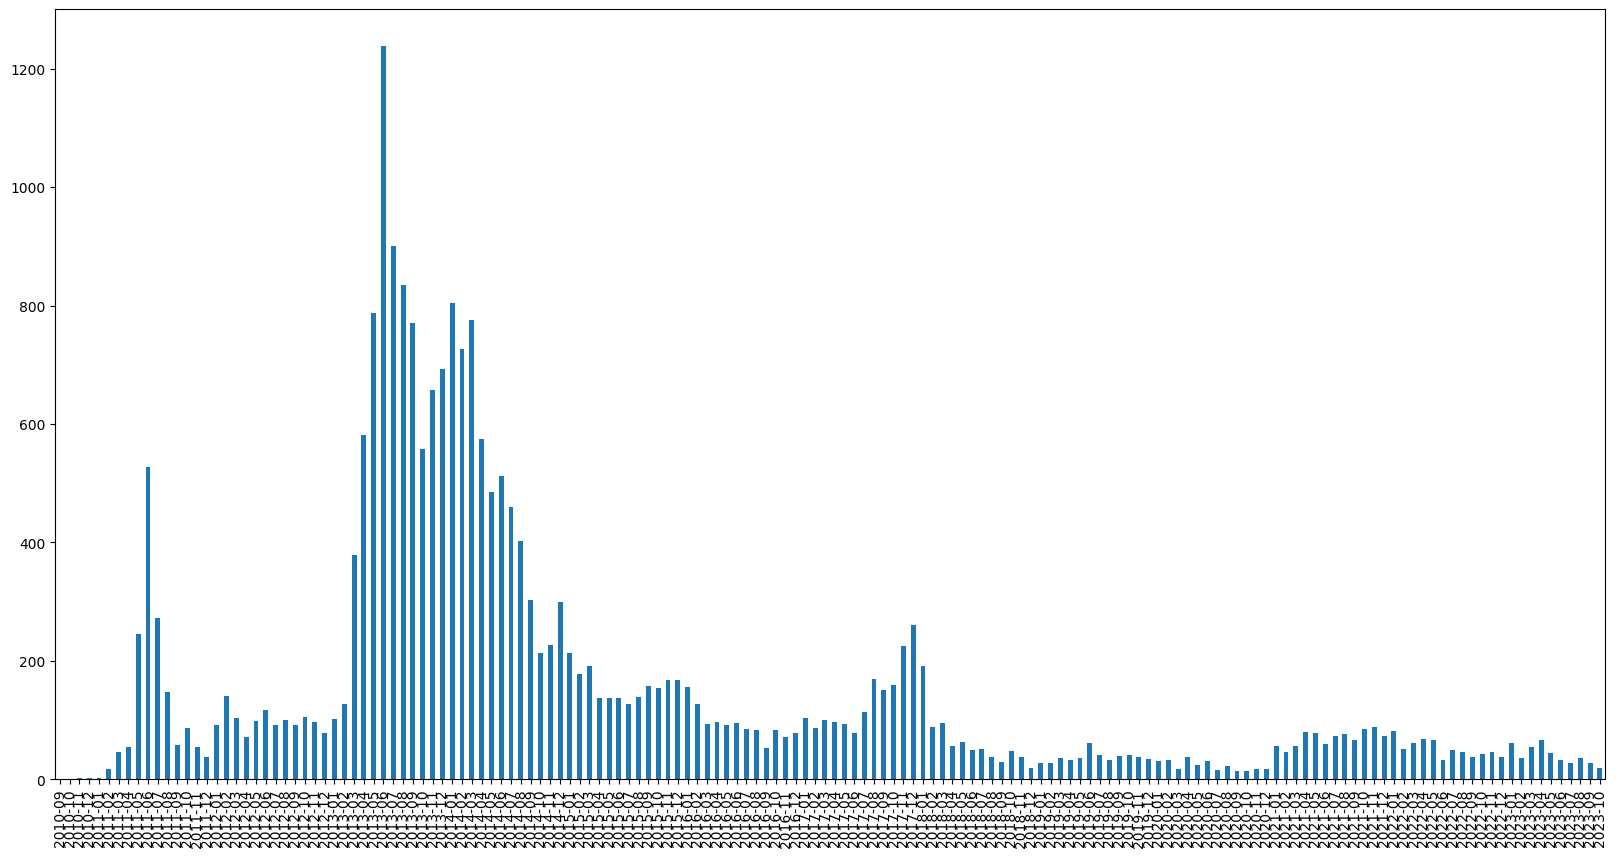

In [11]:
# df["month"] = df["dates"].apply(lambda x: x.split("<sep>")[0][:7])
# #plot distribution of months in threads
# df["month"].value_counts().sort_index().plot(kind="bar", figsize=(20,10))

import matplotlib.pyplot as plt
# plot all_dates with a bar plot
plt.figure(figsize=(20,10))
value_counts = pd.Series(all_dates).value_counts().sort_index()
value_counts.plot(kind="bar")

<Axes: ylabel='Amount of threads'>

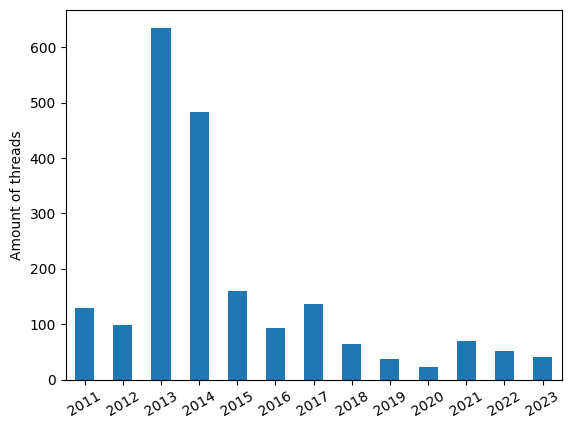

In [12]:
# obtain a yearly average of value_counts
yearly = value_counts.groupby(value_counts.index.str[:4]).mean().iloc[1:]
# yearly.plot(kind="bar")
# plot with y axis labelled as "count", x axis tilted by 30 degrees
yearly.plot(kind="bar", ylabel="Amount of threads", rot=30)

<Axes: xlabel='category'>

<Figure size 2000x1000 with 0 Axes>

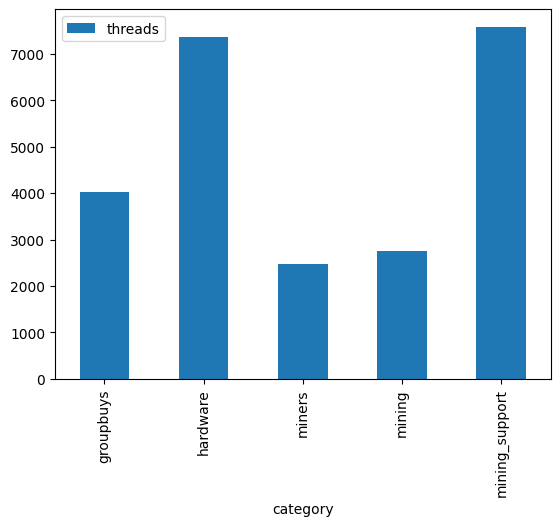

In [14]:
# plot threads in category
plt.figure(figsize=(20,10))
threads_in_category = pd.DataFrame(threads_in_category)
threads_in_category.plot(kind="bar", x="category", y="threads")

In [15]:
all_dates = pd.DataFrame(all_dates)
# count dates after 2014
print(all_dates[all_dates[0] > "2015-01"].value_counts().sum())
# count dates after 2018
print(all_dates[all_dates[0] > "2018-01"].value_counts().sum())

7819
3173
